In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy.integrate import quad
from scipy.integrate import solve_ivp

G = 6.6743*10**-11 #m^3/kg/s^2
g0 = 9.81 #m/s^2
ME = 5.972*10**24 #kg
RE = 6378.1 #km
SrE = 7.272*10**-5 #rad/s

MM = 7.35*10**22 #kg
RM = 1738.1 #km
m = 1 #kg

print("A test mass would take", np.sqrt((2*4000)/g0), "seconds to reach the bottom of a 4km mine shaft.")

A test mass would take 28.55686245854129 seconds to reach the bottom of a 4km mine shaft.


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.003e-02 ...  2.997e+01  3.000e+01]
        y: [[ 0.000e+00 -4.423e-03 ... -4.406e+03 -4.414e+03]
            [ 0.000e+00 -2.946e-01 ... -2.940e+02 -2.943e+02]]
      sol: None
 t_events: [array([ 2.856e+01])]
 y_events: [array([[-4.000e+03, -2.801e+02]])]
     nfev: 44
     njev: 0
      nlu: 0
[array([28.55686246])]


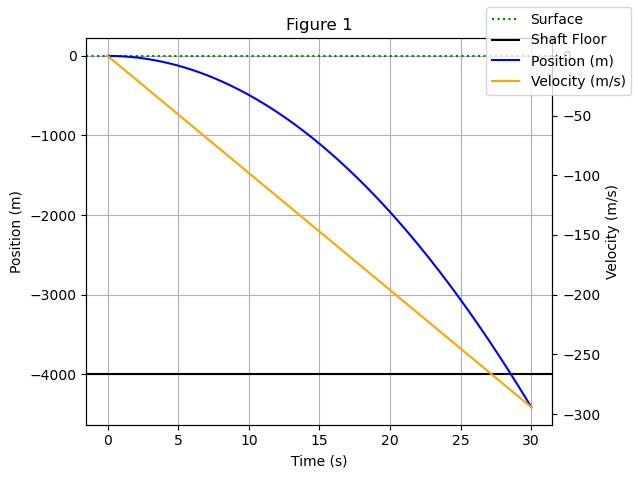

In [12]:
t0 = 0
tf = 30
tstep = 1000
t = np.linspace(t0, tf, tstep)
alpha = 0 #Drag Coefficient
gamma = 0 #v dependence on gamma

def dydt_basic(t, s): # s=state vector
    y, v = s
    dydt = v
    dvdt = -g0 #+ alpha * np.abs(s[1])**gamma
    return [dydt, dvdt]

def crash(t,s):
    return s[0]+4000
    
crash.terminal = False

y0, v0 = 0, 0

soln_basic = solve_ivp(fun=dydt_basic, t_span=(t0, tf), y0=[y0, v0], t_eval=t, events=crash)
print(soln_basic)

tt_basic = soln_basic.t
pos_basic = soln_basic.y[0]
vel_basic = soln_basic.y[1]

fig, ax=plt.subplots()
ax.axhline(0, color = 'g', ls=':', label = 'Surface')
ax.axhline(-4000, color = 'k', label = 'Shaft Floor')
ax.set_title('Figure 1')
ax.grid(True)
ax.plot(tt_basic, pos_basic, color='b', label = 'Position (m)')
ax.set_ylabel('Position (m)')
ax.set_xlabel('Time (s)')
ax2 = ax.twinx()
ax2.plot(tt_basic, vel_basic, color='orange', label = 'Velocity (m/s)')
ax2.set_ylabel('Velocity (m/s)')
fig.legend()
fig, plt.tight_layout()
print(soln_basic.t_events)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.003e-02 ...  2.997e+01  3.000e+01]
        y: [[ 0.000e+00 -4.421e-03 ... -4.402e+03 -4.411e+03]
            [ 0.000e+00 -2.944e-01 ... -2.938e+02 -2.940e+02]]
      sol: None
 t_events: [array([ 2.857e+01])]
 y_events: [array([[-4.000e+03, -2.800e+02]])]
     nfev: 44
     njev: 0
      nlu: 0
[array([28.56731539])]


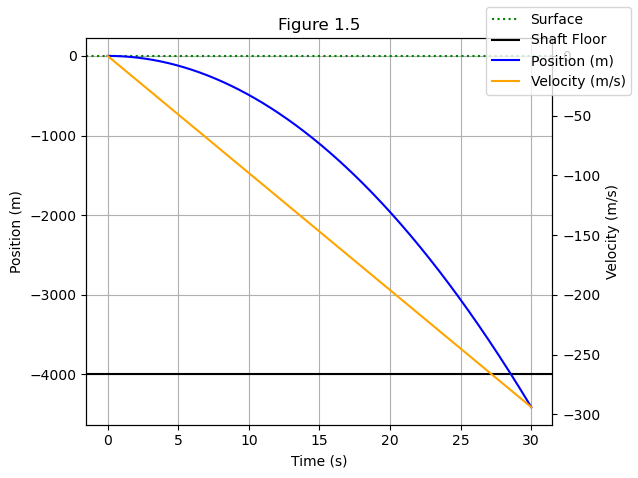

In [13]:

def g(y):
    return g0 * (((RE*1000)+y-4000)/(RE*1000))

def dydt_varg(t, s): # s=state vector
    y, v = s
    dydt = v
    dvdt = -g(y) #+ alpha * np.abs(s[1])**gamma
    return [dydt, dvdt]

def crash(t,s):
    return s[0]+4000
    
crash.terminal = False

y0, v0 = 0, 0

soln_varg = solve_ivp(fun=dydt_varg, t_span=(t0, tf), y0=[y0, v0], t_eval=t, events=crash)
print(soln_varg)

tt_varg = soln_varg.t
pos_varg = soln_varg.y[0]
vel_varg = soln_varg.y[1]

fig, ax=plt.subplots()
ax.axhline(0, color = 'g', ls=':', label = 'Surface')
ax.axhline(-4000, color = 'k', label = 'Shaft Floor')
ax.set_title('Figure 1.5')
ax.grid(True)
ax.plot(tt_varg, pos_varg, color='b', label = 'Position (m)')
ax.set_ylabel('Position (m)')
ax.set_xlabel('Time (s)')
ax2 = ax.twinx()
ax2.plot(tt_varg, vel_varg, color='orange', label = 'Velocity (m/s)')
ax2.set_ylabel('Velocity (m/s)')
fig.legend()
fig, plt.tight_layout()

print(soln_varg.t_events)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.604e-02 ...  3.596e+01  3.600e+01]
        y: [[ 4.000e+03  4.000e+03 ... -1.335e+03 -1.345e+03]
            [ 0.000e+00 -3.537e-01 ... -2.537e+02 -2.538e+02]]
      sol: None
 t_events: [array([ 3.049e+01])]
 y_events: [array([[-1.364e-12, -2.325e+02]])]
     nfev: 44
     njev: 0
      nlu: 0


(<Figure size 640x480 with 2 Axes>, None)

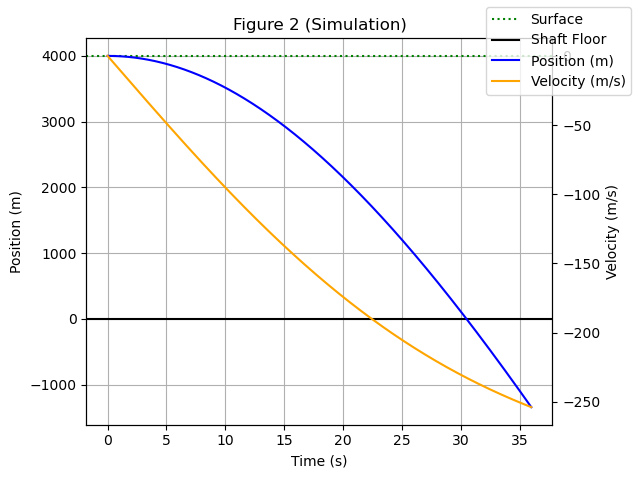

In [15]:
alpha0 = 0.0001
gamma0 = 2

t0 = 0
tf = 36
tstep = 1000
t = np.linspace(t0, tf, tstep)

def dydt_sim(t, s): # s=state vector
    y, v = s
    dydt = v
    dvdt = -g(y+4000) + alpha0 * np.abs(s[1])**gamma0
    return [dydt, dvdt]

def crash(t,s):
    return s[0]
    
crash.terminal = False

y0, v0 = 4000, 0

soln_sim = solve_ivp(fun=dydt_sim, t_span=(t0, tf), y0=[y0, v0], t_eval=t, events=crash)
print(soln_sim)

tt_sim = soln_sim.t
pos_sim = soln_sim.y[0]
vel_sim = soln_sim.y[1]


fig, ax=plt.subplots()
ax.axhline(4000, color = 'g', ls=':', label = 'Surface')
ax.axhline(0, color = 'k', label = 'Shaft Floor')
ax.set_title('Figure 2 (Simulation)')
ax.grid(True)
ax.plot(tt_sim, pos_sim, color='b', label = 'Position (m)')
ax.set_ylabel('Position (m)')
ax.set_xlabel('Time (s)')
ax2 = ax.twinx()
ax2.plot(tt_sim, vel_sim, color='orange', label = 'Velocity (m/s)')
ax2.set_ylabel('Velocity (m/s)')
fig.legend()
fig, plt.tight_layout()
# plt.savefig("Part2_fig2.png")

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.250e+00 ...  3.375e+01  3.600e+01]
        y: [[ 0.000e+00 -2.705e-03 ... -8.287e+00 -9.941e+00]
            [ 0.000e+00 -2.480e+01 ... -4.776e+03 -5.338e+03]
            [ 0.000e+00 -3.606e-03 ... -6.946e-01 -7.763e-01]
            [ 0.000e+00 -2.202e+01 ... -2.456e+02 -2.536e+02]]
      sol: None
 t_events: [array([ 2.225e+01])]
 y_events: [array([[-2.500e+00, -2.251e+03, -3.274e-01, -1.885e+02]])]
     nfev: 50
     njev: 0
      nlu: 0


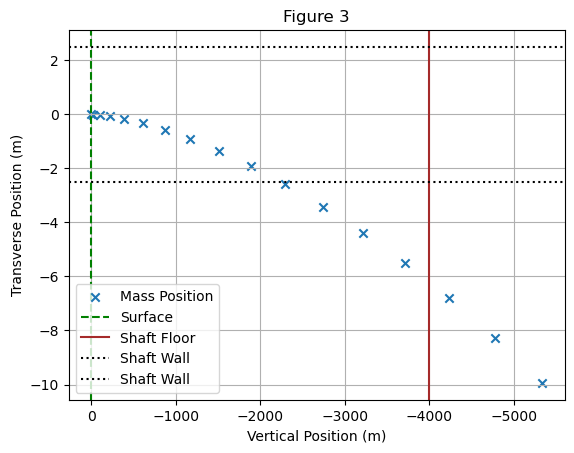

In [5]:
t0 = 0
tf = 36
tstep1 = 17
t1 = np.linspace(t0, tf, tstep1)

def cori(t, s):
    x, y, vx, vy = s
    ax = 2 * SrE * vy
    ay = -g(y) - (2 * SrE * vx) + alpha0 * np.abs(s[3])**gamma0
    return [vx, vy, ax, ay]

def wall(t,s):
    return (s[0]+2.5)
    
wall.terminal = False

y0 = [0, 0, 0, 0]
soln_cori = solve_ivp(cori, t_span=(t0, tf), y0=y0, t_eval=t1, events=wall)

tt_cori = soln_cori.t
posx_cori = soln_cori.y[0]
posy_cori = soln_cori.y[1]
acx_cori = soln_cori.y[2]
acy_cori = soln_cori.y[3]

print(soln_cori)

fig, ax=plt.subplots()
ax.grid(True)
ax.set_title('Figure 3')
ax.set_xlabel('Vertical Position (m)')
ax.set_ylabel('Transverse Position (m)')
ax.scatter(posy_cori, posx_cori, label='Mass Position', marker='x')
ax.axvline(0, color = 'g', ls='--', label = 'Surface')
ax.axvline(-4000, color = 'brown', label = 'Shaft Floor')
ax.axhline(-2.5, ls=':', color='k', label='Shaft Wall')
ax.axhline(2.5, ls=':', color='k', label='Shaft Wall')
ax.legend(loc='lower left')
ax, plt.gca().invert_xaxis();
# plt.savefig("Part3_fig3.png")

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  6.061e-01 ...  5.030e+01  5.091e+01]
        y: [[ 1.276e+04  1.275e+04 ...  3.316e+02  3.051e+01]
            [ 0.000e+00 -5.954e+00 ... -4.938e+02 -4.998e+02]]
      sol: None
 t_events: [array([ 3.604e+01]), array([ 5.097e+01])]
 y_events: [array([[ 6.378e+03, -3.539e+02]]), array([[ 0.000e+00, -5.004e+02]])]
     nfev: 44
     njev: 0
      nlu: 0
The object passes through the Earth's core in 36.04 seconds at 353.9 km/s


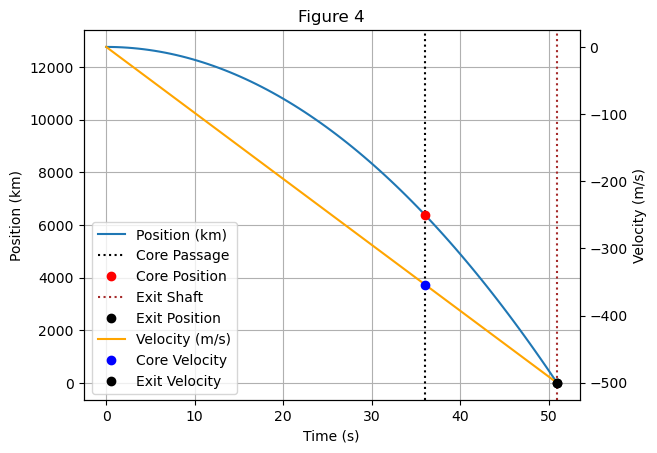

In [19]:
tf2 = 60
t_step2=100
t2 = np.linspace(t0, tf2, t_step2)

def inf(t, s):
    y, v = s
    dy = v
    dv = -g(y)
    return [dy, dv]

y0 = 2*RE, 0

def core(t, s):
    return s[0]-RE

core.terminal=False

def china(t, s):
    return s[0]

china.terminal=True

soln_inf=solve_ivp(fun=inf, t_span=(t0, tf2), y0=y0, t_eval=t2, events=(core, china))

print(soln_inf)

tt_inf = soln_inf.t
pos_inf = soln_inf.y[0]
vel_inf = soln_inf.y[1]

fig, ax=plt.subplots()
ax.grid(True)
ax.set_title('Figure 4')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Position (km)')
ax2 = ax.twinx()
ax.plot(tt_inf, pos_inf, label='Position (km)')
ax2.plot(tt_inf, vel_inf, label='Velocity (m/s)', color='orange')
ax.axvline(3.604e+01, ls=':', color='k', label='Core Passage')
ax.plot(3.604e+01, 6.378e+03, 'ro', label='Core Position')
ax2.plot(3.604e+01, -3.539e+02, 'bo', label='Core Velocity')
ax.axvline(5.097e+01, ls=':', color='brown', label='Exit Shaft')
ax.plot(5.097e+01, 0, 'ko', label='Exit Position')
ax2.plot(5.097e+01, -5.004e+02, 'ko', label='Exit Velocity')
ax2.set_ylabel('Velocity (m/s)')
fig.legend(loc=(0.14,0.13))

print("The object passes through the Earth's core in", 3.604e+01, 'seconds at', 3.539e+02, 'km/s')

In [7]:
v_orbit = np.sqrt(G*ME/RE*1000)
T_orbit = (2* np.pi * RE*1000)/ v_orbit*1000
TRE_orbit = (2*np.pi*RE*1000)/v_orbit
print(v_orbit, 'km/s', T_orbit, 's')
# print(TRE_orbit)


7905277.129890416 km/s 5069.371199675785 s


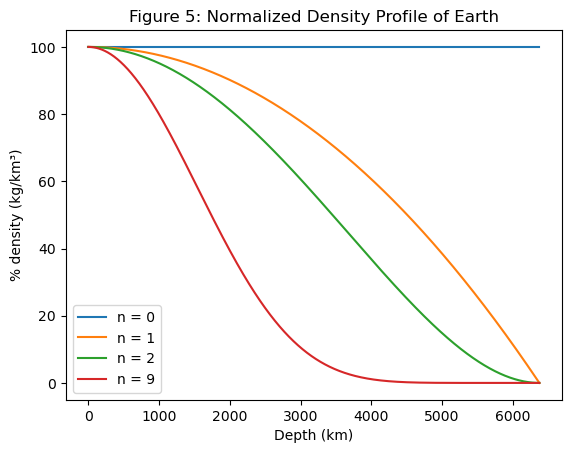

In [8]:
r0=0
rf = RE
r = np.linspace(r0, rf, 1000)

def rho_normal(r, n):
    return (1-(r/RE)**2)**n

n_vals = [0, 1, 2, 9]

fig, ax=plt.subplots()

for n in n_vals:
    rho = rho_normal(r, n)
    ax.plot(r, rho*100, label=f'n = {n}')

ax.set_title('Figure 5: Normalized Density Profile of Earth')
ax.set_xlabel('Depth (km)')
ax.set_ylabel('% density (kg/km\u00B3)')
ax.legend(loc='lower left');

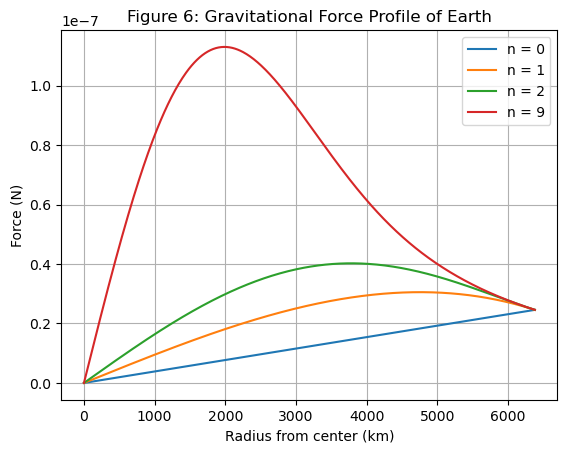

In [9]:
r_vals= np.linspace(1e-6,RE, 500)

def compute_rho_n(n):
    integrand = lambda r: rho_normal(r, n) * r**2
    mass, _ = quad(integrand, 0, RE)
    rho_n = 1 / (4 * np.pi * mass)
    return rho_n

def mass_tot(r, n, rho_n):
    integrand = lambda rp: rho_normal(rp, n) * rp**2
    m, _ = quad(integrand, 0, r)
    return 4 * np.pi * rho_n * m

fig, ax = plt.subplots()
ax.grid(True)

for n in n_vals:
    rho_n = compute_rho_n(n)
    force = [mass_tot(r, n, rho_n) / r**2 for r in r_vals]
    ax.plot(r_vals, force, label=f'n = {n}')

ax.set_title('Figure 6: Gravitational Force Profile of Earth')
ax.set_xlabel('Radius from center (km)')
ax.set_ylabel('Force (N)')
ax.legend();

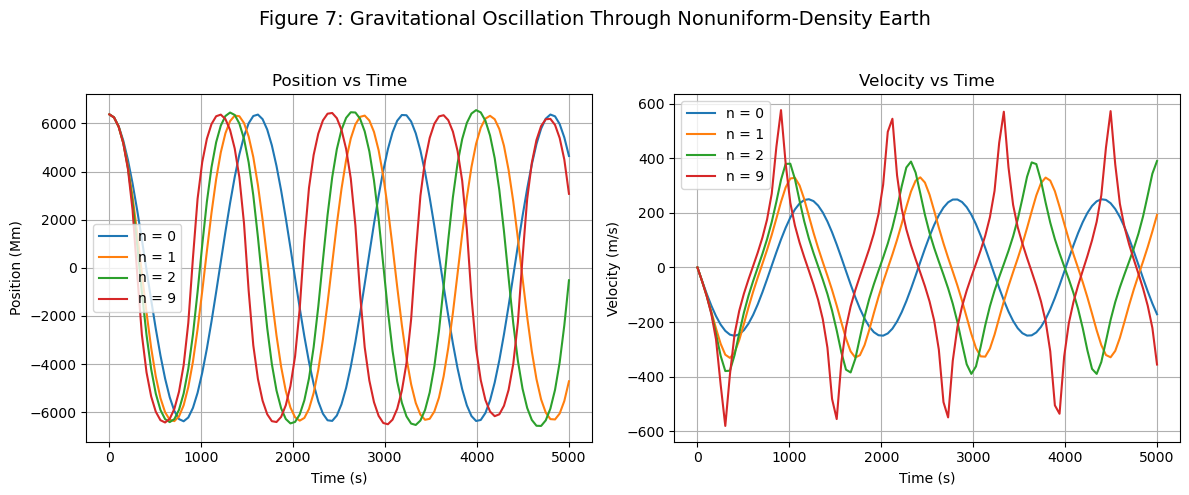

In [7]:
def compute_rho_n(n):
    f = lambda r: (1 - (r**2 / RE**2))**n * r**2
    total, _ = quad(f, 0, RE)
    return ME / (4 * np.pi * total)

def mass_integral(r, n, rho_n):
    f = lambda rp: rho_n * (1 - (rp**2 / RE**2))**n * rp**2
    m, _ = quad(f, 0, r)
    return 4 * np.pi * m

def acceleration(r, n, rho_n):
    if r == 0:
        return 0
    m_r = mass_integral(abs(r), n, rho_n)
    return -G * m_r / r**2 * np.sign(r)

def accel_system(t, y, n, rho_n):
    pos, vel = y
    acc = acceleration(pos, n, rho_n)
    return [vel, acc]

# Time span
t_span = (0, 0.5)
t07 = 0
tf7 = 0.5
t_eval7 = np.linspace(t07, tf7, 100)

# Initialize plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
n_vals = [0, 1, 2, 9]

# Simulate and plot
for n in n_vals:
    rho_n = compute_rho_n(n)
    sol = solve_ivp(accel_system, t_span, [RE, 0], args=(n, rho_n), t_eval=t_eval7)
    pos_dens = sol.y[0]
    vel_dens = sol.y[1]
    ttt = sol.t
    ax[0].plot(ttt*10000, pos_dens , label=f"n = {n}")  # Mm
    ax[1].plot(ttt*10000, vel_dens/1000, label=f"n = {n}")        # m/s

# Left: Position
ax[0].set_title("Position vs Time")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Position (Mm)")
ax[0].grid(True)
ax[0].legend()

# Right: Velocity
ax[1].set_title("Velocity vs Time")
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Velocity (m/s)")
ax[1].grid(True)
ax[1].legend()

fig.suptitle("Figure 7: Gravitational Oscillation Through Nonuniform-Density Earth", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.savefig("Part4_fig7.png")

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.021e-01 ...  1.019e+02  1.020e+02]
        y: [[ 3.476e+06  3.476e+06 ...  2.546e+05  2.349e+05]
            [ 0.000e+00 -4.145e+01 ... -1.891e+05 -1.975e+05]]
      sol: None
 t_events: [array([ 8.413e+01]), array([], dtype=float64)]
 y_events: [array([[ 1.738e+06, -5.326e+04]]), array([], dtype=float64)]
     nfev: 98
     njev: 0
      nlu: 0


Text(0, 0.5, 'Velocity (km/s)')

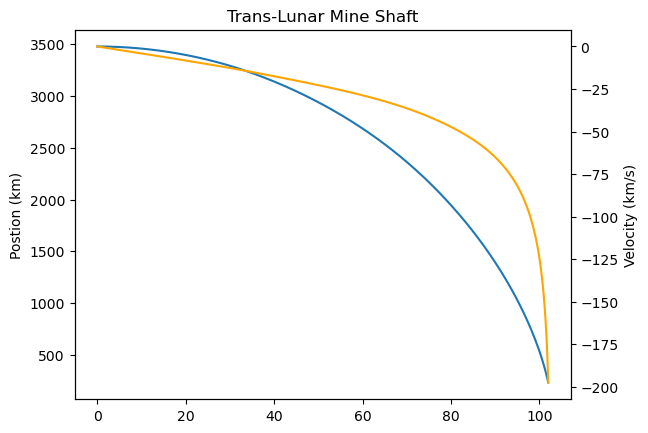

In [8]:
tf3=102
t_step3=1000
t3=np.linspace(t0, tf3, t_step3)

def gm(y):
    return (G*MM*1000)/y**2

def inf_moon(t, s):
    y, v = s
    dym = v
    dvm = -gm(y)
    return [dym, dvm]

y0 = 2*RM*1000, 0

def core_m(t, s):
    return s[0]-RM*1000

core_m.terminal=False

def mare_frigoris(t, s):
    return s[0]

mare_frigoris.terminal=True

soln_inf_moon=solve_ivp(fun=inf_moon, t_span=(t0, tf3), y0=y0, t_eval=t3, events=(core_m, mare_frigoris))

print(soln_inf_moon)

tt_inf_moon = soln_inf_moon.t
pos_inf_moon = soln_inf_moon.y[0]
vel_inf_moon = soln_inf_moon.y[1]

fig, ax=plt.subplots()
ax.set_title('Trans-Lunar Mine Shaft')
ax.plot(tt_inf_moon, pos_inf_moon/1000)
ax.set_ylabel('Postion (km)')
ax2 = ax.twinx()
ax2.plot(tt_inf_moon, vel_inf_moon/1000, color='orange')
ax2.set_ylabel('Velocity (km/s)')

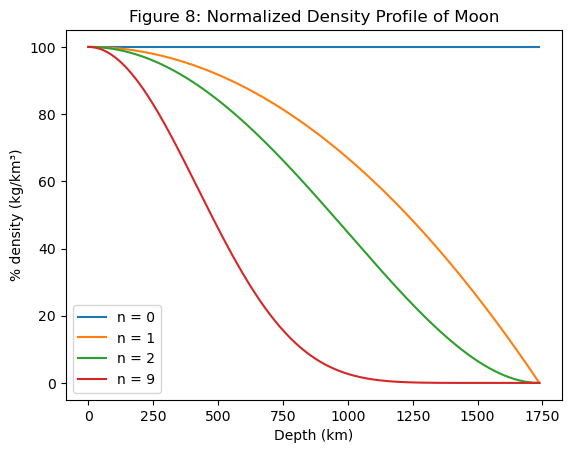

In [10]:
rm0=0
rmf = RM
rm = np.linspace(rm0, rmf, 1000)

def rho_normal_m(rm, n):
    return (1-(rm/RM)**2)**n

n_vals = [0, 1, 2, 9]

fig, ax=plt.subplots()

for n in n_vals:
    rho = rho_normal_m(rm, n)
    ax.plot(rm, rho*100, label=f'n = {n}')

ax.set_title('Figure 8: Normalized Density Profile of Moon')
ax.set_xlabel('Depth (km)')
ax.set_ylabel('% density (kg/km\u00B3)')
ax.legend(loc='lower left');

In [15]:
# D=MM/(4*np.pi*3)
# print(D)

# De=ME/(4*np.pi*3)
# print(De)